## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import polynomial


def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

多项式基函数：
$$
\Phi(x) =
\begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^{n-1} \\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^{n-1} \\
1 & x_3 & x_3^2 & x_3^3 & \cdots & x_3^{n-1} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & x_m^3 & \cdots & x_m^{n-1}
\end{bmatrix}
$$


高斯基函数：
$$
ϕ_j(x) = exp(-\frac{(x-μ_j)^2}{2δ^2})
$$

$$
\Phi(x) =
\begin{bmatrix}
\exp\left(-\frac{(x_1 - \mu_1)^2}{2\sigma^2}\right) & \exp\left(-\frac{(x_1 - \mu_2)^2}{2\sigma^2}\right) & \cdots & \exp\left(-\frac{(x_1 - \mu_n)^2}{2\sigma^2}\right) \\
\exp\left(-\frac{(x_2 - \mu_1)^2}{2\sigma^2}\right) & \exp\left(-\frac{(x_2 - \mu_2)^2}{2\sigma^2}\right) & \cdots & \exp\left(-\frac{(x_2 - \mu_n)^2}{2\sigma^2}\right) \\
\vdots & \vdots & \ddots & \vdots \\
\exp\left(-\frac{(x_m - \mu_1)^2}{2\sigma^2}\right) & \exp\left(-\frac{(x_m - \mu_2)^2}{2\sigma^2}\right) & \cdots & \exp\left(-\frac{(x_m - \mu_n)^2}{2\sigma^2}\right)
\end{bmatrix}
$$



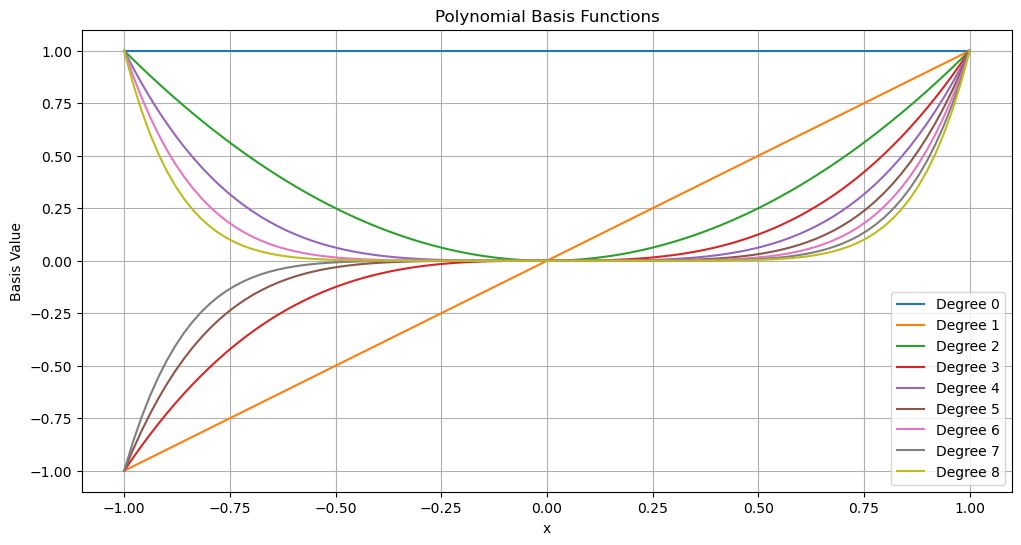

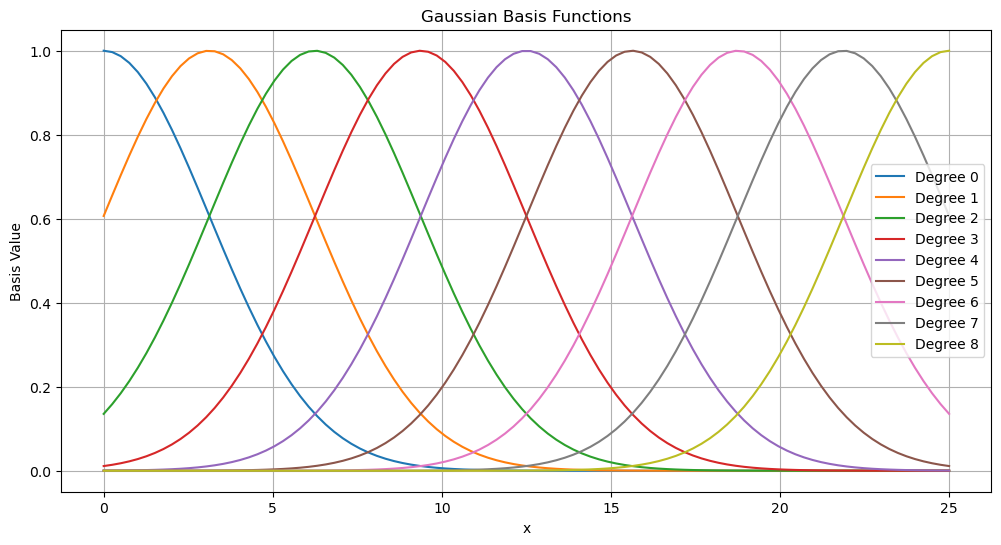

In [46]:
def identity_basis(x):
    """
    恒等基函数
    """
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    """
    多项式基函数
    """
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    ret = np.hstack([x ** i for i in range(feature_num)])

    return ret

def gaussian_basis(x, feature_num=10):
    """
    高斯基函数
    """
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    mu = np.linspace(0, 25, feature_num) # 选择 feature_num 个中心点
    sigma = (mu[1] - mu[0]) if feature_num > 1 else 1  # 计算标准差

    x = np.expand_dims(x, axis=1) # shape(N, 1)
    ret = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))  # 计算高斯函数值

    return ret

# 展示基函数
a = np.linspace(-1, 1, 100)
b = np.linspace(0, 25, 100)
degree = 9
mult_basis = multinomial_basis(a, degree)
gauss_basis = gaussian_basis(b, degree)

plt.figure(figsize=(12, 6))
for i in range(degree):
    plt.plot(a, mult_basis[:, i], label=f'Degree {i}')
plt.title('Polynomial Basis Functions')
plt.xlabel('x')
plt.ylabel('Basis Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for i in range(degree):
    plt.plot(b, gauss_basis[:, i], label=f'Degree {i}')
plt.title('Gaussian Basis Functions')
plt.xlabel('x')
plt.ylabel('Basis Value')
plt.legend()
plt.grid(True)
plt.show()

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

最小二乘法（Least Squares）公式推导

假设我们有一组训练数据$\{(x_1, y_1), (x_2, y_2), ... , (x_m, y_m)\}$，其中$x_i$是输入，$y_i$是对应的真实输出。我们可以使用一个线性模型对这组数据进行拟合:
$$
\hat{y}_i = \phi(x_i)^T\omega
$$
其中
- $\hat{y}_i$是预测值。
- $\phi(x_i)$是输入$x_i$通过基函数映射后的特征向量。(如多项式基函数、高斯基函数等)
- $\omega$是需要优化的参数。

最小二乘法的优化目标是使得**损失函数**最小化，即实际输出$y_i$与预测输出$\hat{y}_i$之间的误差的平方和最小化:
$$
J(w) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \phi(x_i)^T w \right)^2
$$
我们对$J(w)$关于$w$求导：
$$
\frac{\partial J(w)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( \phi(x_i)^T w - y_i \right) \phi(x_i)
$$
为了最小化损失函数，我们将其导数设为零，得到如下方程：
$$
\sum_{i=1}^{m} \left( \phi(x_i)^T w - y_i \right) \phi(x_i) = 0
$$
将上式写成矩阵形式：
$$
\Phi = \begin{bmatrix} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_m)^T \end{bmatrix}, \quad y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{bmatrix}
$$
$$
\Phi^T (\Phi w - y) = 0
$$
如果 $ \Phi^T \Phi $ 是可逆的，那么可以通过以下公式求解 $ w $：
$$
w = (\Phi^T \Phi)^{-1} \Phi^T y
$$

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

梯度下降更新规则：
$$
\theta_{\text{new}} = \theta_{\text{old}} - \alpha \nabla_{\theta} J(\theta)
$$


在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [47]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = identity_basis # 基函数
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # 偏置项b
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========

    # 最小二乘法进行模型优化
    # w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_train

    # 梯度下降法进行模型优化
    w = np.zeros(phi.shape[1])
    m = len(y_train)
    learning_rate=0.01
    iterations=1000
    for _ in range(iterations):
        predictions = phi @ w
        error = predictions - y_train
        gradient = (1/m) * phi.T @ error
        w -= learning_rate * gradient

    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

训练集维度: (300,)
测试集维度: (200,)
[[ 1.    2.65]
 [ 1.    4.7 ]
 [ 1.   14.25]
 [ 1.   22.1 ]
 [ 1.   10.55]
 [ 1.    6.5 ]
 [ 1.    4.1 ]
 [ 1.   24.65]
 [ 1.   24.4 ]
 [ 1.   22.8 ]
 [ 1.    0.9 ]
 [ 1.   11.3 ]
 [ 1.   21.8 ]
 [ 1.   22.55]
 [ 1.   19.2 ]
 [ 1.   21.4 ]
 [ 1.   11.7 ]
 [ 1.    5.75]
 [ 1.   15.15]
 [ 1.    7.65]
 [ 1.    7.45]
 [ 1.    1.95]
 [ 1.   18.35]
 [ 1.   19.3 ]
 [ 1.    2.8 ]
 [ 1.   11.35]
 [ 1.   23.  ]
 [ 1.    0.25]
 [ 1.    5.7 ]
 [ 1.    8.3 ]
 [ 1.    0.4 ]
 [ 1.    0.15]
 [ 1.   24.6 ]
 [ 1.    0.75]
 [ 1.    9.1 ]
 [ 1.   20.65]
 [ 1.   12.85]
 [ 1.   19.5 ]
 [ 1.   15.4 ]
 [ 1.   20.45]
 [ 1.   21.05]
 [ 1.   19.  ]
 [ 1.   12.65]
 [ 1.   18.5 ]
 [ 1.   15.1 ]
 [ 1.    5.25]
 [ 1.   17.3 ]
 [ 1.   17.85]
 [ 1.    3.5 ]
 [ 1.    1.05]
 [ 1.   19.25]
 [ 1.    9.9 ]
 [ 1.   21.15]
 [ 1.    0.8 ]
 [ 1.   15.95]
 [ 1.    3.1 ]
 [ 1.   12.75]
 [ 1.   15.45]
 [ 1.   20.15]
 [ 1.    6.8 ]
 [ 1.    5.95]
 [ 1.    5.45]
 [ 1.    9.6 ]
 [ 1.    8.65]
 [ 1.    9.8

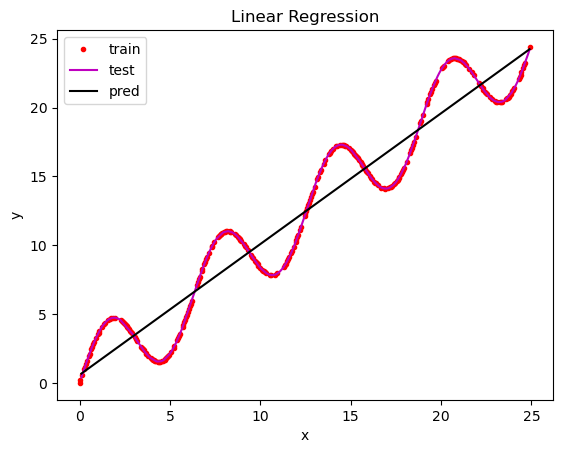

In [48]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print("训练集维度:", x_train.shape)
    print("测试集维度:", x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'm')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()